In [172]:
import pandas as pd
import string
import nltk

### Mise en forme des caractéres : tout en minuscule, suppression de la ponctuation et des chiffres 

In [173]:
df = pd.read_csv("Emotion_final.csv")
df = df.apply(lambda x: x.astype(str).str.lower())
df['Text'] = df['Text'].str.replace('[{}\d]'.format(string.punctuation), '', regex=True)

In [174]:
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,melissa stared at her friend in dism,fear
21455,successive state elections have seen the gover...,fear
21456,vincent was irritated but not dismay,fear
21457,kendallhume turned back to face the dismayed coup,fear


In [175]:
df.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i feel so tortured by it,happy
freq,2,7029


### Suppression des doublons

In [176]:
dup = df.duplicated()
dup.value_counts()

False    21456
True         3
dtype: int64

In [177]:
df = df.drop_duplicates(keep='last')

In [178]:
df.Emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [179]:
df.Emotion.value_counts()

happy       7028
sadness     6265
anger       2992
fear        2651
love        1641
surprise     879
Name: Emotion, dtype: int64

In [180]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/apprenant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Stopwords

In [182]:
stops = set(stopwords.words('english'))
nv_mots_stops = ['feel', 'feeling','feelings', 'look', 'days','life','like','im','really', 'see', 'life', 'today','didnt','go', 'know', 'get', 'want', 'would', 'time', 'little', 'ive', 'still', 'even', 'one',  'people', 'think', 'bit', 'things', 'much', 'dont', 'make', 'day', 'something', 'back', 'going', 'way', 'could']
stops.update(nv_mots_stops)

### Les 30 mots les plus frequents par sentiments

In [183]:
def top_30_mots(texts, n=30):
    mots = []
    for text in texts:
        for mot in text.split():
            if mot.isalpha() and mot not in stops:
                mots.append(mot)
    mot_freq = {mot: mots.count(mot) for mot in set(mots)}
    top_mots = sorted(mot_freq.items(), key=lambda x: x[1], reverse=True)[:n]
    return top_mots

sentiments = ['sadness', 'anger', 'love', 'surprise', 'fear', 'happy']

top_mots_par_sentiment = {}

for sentiment in sentiments:
    texts = df[df['Emotion'] == sentiment]['Text']
    top_mots = top_30_mots(texts)
    top_mots_par_sentiment[sentiment] = top_mots



In [184]:
top_mots_par_sentiment["sadness"]

[('pretty', 146),
 ('right', 143),
 ('always', 141),
 ('love', 138),
 ('felt', 136),
 ('cant', 132),
 ('sad', 130),
 ('alone', 127),
 ('bad', 126),
 ('say', 125),
 ('made', 124),
 ('depressed', 123),
 ('work', 121),
 ('good', 121),
 ('need', 121),
 ('never', 111),
 ('miserable', 108),
 ('though', 104),
 ('lost', 101),
 ('kind', 101),
 ('also', 100),
 ('left', 99),
 ('home', 99),
 ('last', 99),
 ('feels', 99),
 ('many', 98),
 ('help', 98),
 ('sorry', 97),
 ('guilty', 95),
 ('stupid', 95)]

### HeatMap des mots les plus frequents par sentiment

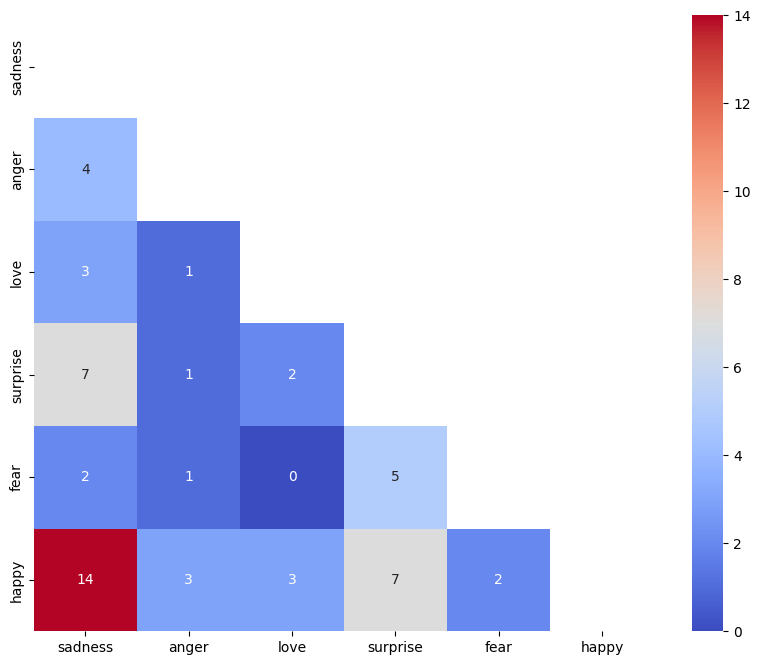

In [185]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

matrice = pd.DataFrame(index=sentiments, columns=sentiments)

for sentiment1 in sentiments:
    for sentiment2 in sentiments:
        mots1 = set(mot for mot, _ in top_mots_par_sentiment[sentiment1])
        mots2 = set(mot for mot, _ in top_mots_par_sentiment[sentiment2])
        mots_commmun = len(mots1 & mots2)
        matrice.loc[sentiment1, sentiment2] = mots_commmun

matrice = matrice.astype(int)   

mask = np.triu(np.ones_like(matrice, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(matrice, annot=True, cmap='coolwarm', mask=mask)
plt.show()


    Pour chaque sentiment on calcule le nombre de mots en commun entre les 30 mots les plus fréquents en convertissant les listes de mots en ensemble. Ensuite on compte les mots qui apparaissent dans les deux set. Le nombre de mots en commun est ensuite affiché dans la matrice

In [186]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/apprenant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [195]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('wordnet')

stops = list(stops)
lemmatizer = WordNetLemmatizer()

df['Text'] = df['Text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(term) for term in word_tokenize(x) if term not in stops))

bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform(df['Text'])

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(df['Text'])


[nltk_data] Downloading package wordnet to
[nltk_data]     /home/apprenant/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/tmp/ipykernel_5910/1143167596.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(term) for term in word_tokenize(x) if term not in stops))
